In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/spam-emails/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [4]:
df.groupby('Category').describe

<bound method GroupBy.describe of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7c06862bbe10>>

In [5]:
df['spam'] = df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [6]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [8]:
X = df['Message']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [9]:
X_vectorizer = v.fit_transform(X)

In [10]:
y = df['Category']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_vectorizer,y,test_size=0.2)

In [13]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [14]:
model.fit(X_train,y_train)

MultinomialNB()

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [17]:
print(accuracy_score(y_test,y_pred))

0.979372197309417


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       951
        spam       0.92      0.94      0.93       164

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [19]:
cm = confusion_matrix(y_test,y_pred)

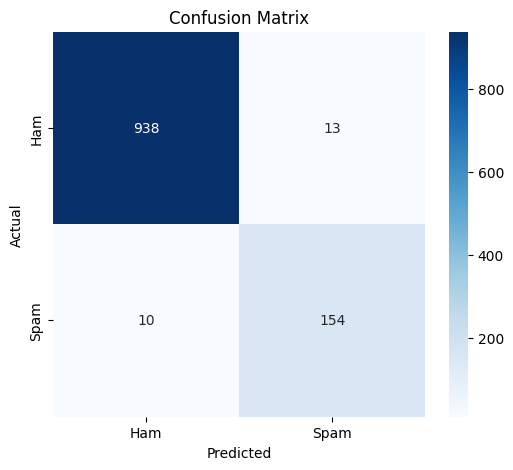

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Test a custom message
sample = ["You've won a free vacation! Reply WIN to claim now."]
sample_vec = v.transform(sample)
prediction = model.predict(sample_vec)
print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")

Prediction: Ham
